In [82]:
import joblib
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from pathlib import Path
import csv
import numpy as np

# Analyze one experiment

In [2]:
experiment_path = "../speech_hypertuning/experiments/audios_per_sid_vs_hidden_size/audios_per_sid_1-hidden_size_2/"
state = joblib.load(experiment_path + '/state.pkl')

In [3]:
state.keys()

dict_keys(['flags', 'output_dir', 'keys_not_saved', 'operative_config', 'config_str', 'seed', 'execution_times', 'dataset_metadata', 'filtered_dataset_metadata', 'speaker_id_mapping', 'partitions', 'model_checkpoint_dir', 'test_metrics'])

In [32]:
pd.set_option('display.max_rows', 200)

In [37]:
df = state['dataset_metadata']
speakers = list(df["VGGFace1 ID"].unique())[:100]
df = df[df["VGGFace1 ID"].isin(speakers)]
df.groupby(['speaker_id']).size()#.describe()

speaker_id
id10018     269
id10020     589
id10044     253
id10045     295
id10061     270
id10096     656
id10104     297
id10105     316
id10107     290
id10130     243
id10147     219
id10148     283
id10167     216
id10168     317
id10203     401
id10231     218
id10242     343
id10248     314
id10252     259
id10254     265
id10292     265
id10300     304
id10317     265
id10326     342
id10343     381
id10352     310
id10357     280
id10362     254
id10371     216
id10376     232
id10393     330
id10397     426
id10419     263
id10428     364
id10520     299
id10525     285
id10539     339
id10540     258
id10560     303
id10564     275
id10571     286
id10582     356
id10583     311
id10586     218
id10601     272
id10635     326
id10662     347
id10679     267
id10683     247
id10710     489
id10715     374
id10722     223
id10744     297
id10757     257
id10758     232
id10762     283
id10786     394
id10787     254
id10825     287
id10856     224
id10868     336
id10870     3

In [39]:
df[df.speaker_id == "id10167"].groupby(['set']).size()

set
test           32
train         152
validation     32
dtype: int64

In [34]:
df = state['partitions']
df['test']#.groupby(['speaker_id']).size().describe()

,Unnamed: 0,index,filename,sr,channels,frames,duration,speaker_id,video_id,segment_id,VGGFace1 ID,Gender,Nationality,dataset,rel_path,set,embedding_filename,class_id
150,141562,141562,/datasets/Voxceleb1/wav/id10986/xFTIClN5z70/00...,16000,1,186241,11.640063,id10986_voxceleb1,xFTIClN5z70,31,Rob_Reiner,m,USA,voxceleb1,wav/id10986/xFTIClN5z70/00031.wav,test,/home/eernst/Voxceleb1/avg_embeddings/id10986_...,0
151,140961,140961,/datasets/Voxceleb1/wav/id10986/Vzqmi3MAixQ/00...,16000,1,145281,9.080063,id10986_voxceleb1,Vzqmi3MAixQ,60,Rob_Reiner,m,USA,voxceleb1,wav/id10986/Vzqmi3MAixQ/00060.wav,test,/home/eernst/Voxceleb1/avg_embeddings/id10986_...,0
152,141655,141655,/datasets/Voxceleb1/wav/id10986/KH-yJAsKo1Q/00...,16000,1,92161,5.760063,id10986_voxceleb1,KH-yJAsKo1Q,36,Rob_Reiner,m,USA,voxceleb1,wav/id10986/KH-yJAsKo1Q/00036.wav,test,/home/eernst/Voxceleb1/avg_embeddings/id10986_...,0
153,141229,141229,/datasets/Voxceleb1/wav/id10986/eWvntayRfe8/00...,16000,1,102401,6.400062,id10986_voxceleb1,eWvntayRfe8,8,Rob_Reiner,m,USA,voxceleb1,wav/id10986/eWvntayRfe8/00008.wav,test,/home/eernst/Voxceleb1/avg_embeddings/id10986_...,0
154,141492,141492,/datasets/Voxceleb1/wav/id10986/tj0Mw2xTE74/00...,16000,1,230401,14.400063,id10986_voxceleb1,tj0Mw2xTE74,8,Rob_Reiner,m,USA,voxceleb1,wav/id10986/tj0Mw2xTE74/00008.wav,test,/home/eernst/Voxceleb1/avg_embeddings/id10986_...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30727,30776,30776,/datasets/Voxceleb1/wav/id10371/7PWqbKWsJKE/00...,16000,1,92161,5.760063,id10371_voxceleb1,7PWqbKWsJKE,3,Helena_Bonham_Carter,f,UK,voxceleb1,wav/id10371/7PWqbKWsJKE/00003.wav,test,/home/eernst/Voxceleb1/avg_embeddings/id10371_...,99
30728,30643,30643,/datasets/Voxceleb1/wav/id10371/nDO1L-HZGI4/00...,16000,1,64001,4.000063,id10371_voxceleb1,nDO1L-HZGI4,1,Helena_Bonham_Carter,f,UK,voxceleb1,wav/id10371/nDO1L-HZGI4/00001.wav,test,/home/eernst/Voxceleb1/avg_embeddings/id10371_...,99
30729,30771,30771,/datasets/Voxceleb1/wav/id10371/XaSFDYbJszo/00...,16000,1,151041,9.440062,id10371_voxceleb1,XaSFDYbJszo,4,Helena_Bonham_Carter,f,UK,voxceleb1,wav/id10371/XaSFDYbJszo/00004.wav,test,/home/eernst/Voxceleb1/avg_embeddings/id10371_...,99
30730,30686,30686,/datasets/Voxceleb1/wav/id10371/bNMRO-UxE9g/00...,16000,1,71681,4.480062,id10371_voxceleb1,bNMRO-UxE9g,5,Helena_Bonham_Carter,f,UK,voxceleb1,wav/id10371/bNMRO-UxE9g/00005.wav,test,/home/eernst/Voxceleb1/avg_embeddings/id10371_...,99


In [36]:
state['execution_times']

{'set_seed_0': {'wall_time': 0.0003826618194580078,
  'process_time': 0.00038429800000017167},
 'load_dataset_0': {'wall_time': 0.20259428024291992,
  'process_time': 0.20258240400000016},
 'subsample_dataset_with_fixed_n_0': {'wall_time': 0.14420580863952637,
  'process_time': 0.14419928099999968},
 'save_upstream_embeddings_0': {'wall_time': 1.2137861251831055,
  'process_time': 4.174725172999999},
 'process_classes_0': {'wall_time': 0.0022499561309814453,
  'process_time': 0.0022520400000001217},
 'get_dataloaders_0': {'wall_time': 0.09586620330810547,
  'process_time': 0.09584373100000043},
 'fit_model_0': {'wall_time': 2820.186756372452,
  'process_time': 2821.9376467989996},
 'test_model_0': {'wall_time': 3.865933418273926,
  'process_time': 5.059620290000112}}

In [37]:
df = pd.read_csv(experiment_path + "/pretrain_logs/version_0/metrics.csv")
df

,epoch,lr-Adam,step,train_loss,train_time,val_loss,val_time
0,NaN,0.0001,0,NaN,NaN,NaN,NaN
1,0.0,NaN,0,NaN,NaN,4.681153,2.404289e+11
2,NaN,0.0001,1,NaN,NaN,NaN,NaN
3,1.0,NaN,1,NaN,NaN,4.681101,2.404289e+11
4,NaN,0.0001,2,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2035,998.0,NaN,998,NaN,NaN,4.629005,2.404289e+11
2036,NaN,0.0001,999,NaN,NaN,NaN,NaN
2037,NaN,0.0001,999,NaN,NaN,NaN,NaN
2038,999.0,NaN,999,4.526367,2.404291e+11,NaN,NaN


In [38]:
train_loss = df[['train_loss', 'epoch']].copy()
train_loss.dropna(inplace=True)
train_loss

,train_loss,epoch
100,4.674824,49.0
202,4.667892,99.0
304,4.661076,149.0
406,4.654699,199.0
508,4.647538,249.0
610,4.640682,299.0
712,4.633234,349.0
814,4.626015,399.0
916,4.618834,449.0
1018,4.611079,499.0


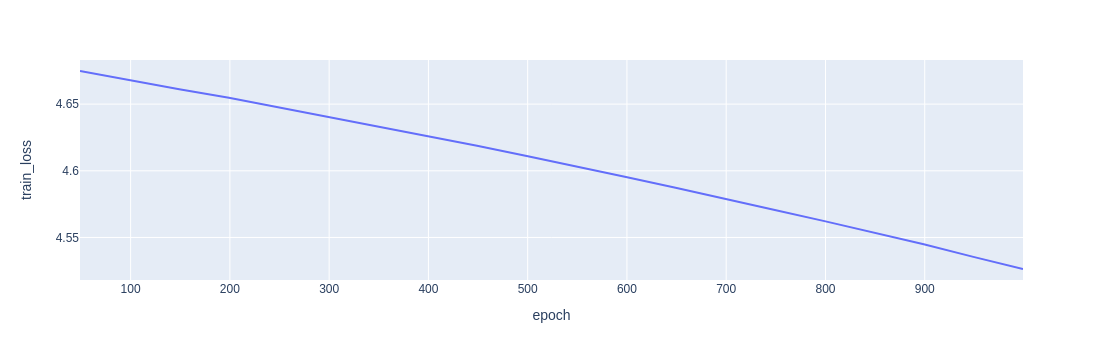

In [39]:
fig = px.line(train_loss, x='epoch', y='train_loss')
fig.show()

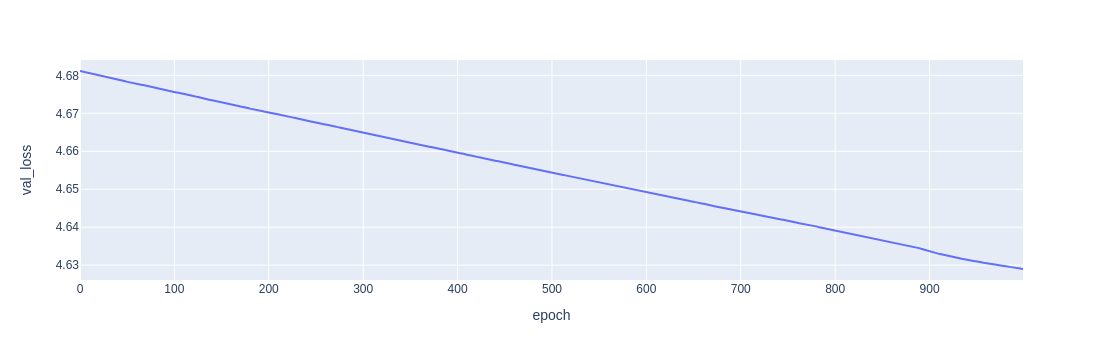

In [40]:
val_loss = df[['val_loss', 'epoch']].copy()
val_loss.dropna(inplace=True)
fig = px.line(val_loss, x='epoch', y='val_loss')
fig.show()

In [41]:
val_loss.val_loss.describe()

count    1000.000000
mean        4.654613
std         0.015078
min         4.628986
25%         4.641721
50%         4.654388
75%         4.667586
max         4.681153
Name: val_loss, dtype: float64

In [42]:
val_loss[val_loss.val_loss == val_loss.val_loss.min()]

,val_loss,epoch
2039,4.628986,999.0


# Analyze project

In [83]:
project_path = "../speech_hypertuning/experiments/audios_per_sid_vs_hidden_size/"

In [84]:
states_paths = Path(project_path).rglob('*state.pkl')
states = {}
for path in states_paths:
    experiment_name = path.parent.name
    if experiment_name not in states:
        state = joblib.load(path)
        states[experiment_name] = state

In [85]:
states_wo_test_metrics = {exp_name: state for exp_name, state in states.items() if not 'test_metrics' in state}
print(f"{len(states_wo_test_metrics)} states wo test metrics")

1 states wo test metrics


In [86]:
states = {k: v for k,v in states.items() if k not in states_wo_test_metrics}

In [87]:
test_losses = {}
acc_top1 = {}
acc_top5 = {}
for exp_name, state in states.items():
    n, hidden_size = exp_name.split("-")
    n, hidden_size = n.split("_")[-1], hidden_size.split("_")[-1]
    
    if n not in test_losses:
        test_losses[n] = {}
        acc_top1[n] = {}
        acc_top5[n] = {}
    metrics = state['test_metrics'][0]
    test_losses[n][hidden_size] = metrics['test_loss']
    acc_top1[n][hidden_size] = metrics['test_accuracy_top1']
    acc_top5[n][hidden_size] = metrics['test_accuracy_top5']

In [88]:
def get_matrix_from_dict(metrics_dict, keys1, keys2):
    return [
        [
            metrics_dict[str(key1)][str(key2)] if str(key1) in metrics_dict and str(key2) in metrics_dict[str(key1)] else np.nan 
            for key2 in keys2
        ] for key1 in keys1
    ]

In [89]:
ns = [150, 100, 75, 50, 30, 20, 10, 5, 1]
hidden_sizes = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192]

In [90]:
test_losses_matrix = get_matrix_from_dict(test_losses, ns, hidden_sizes)
test_acc1_matrix = get_matrix_from_dict(acc_top1, ns, hidden_sizes)
test_acc5_matrix = get_matrix_from_dict(acc_top5, ns, hidden_sizes)

In [91]:
data = {ns: hidden_size_losses for ns, hidden_size_losses in zip(ns, test_losses_matrix)}
data['hidden_sizes'] = hidden_sizes
df = pd.DataFrame.from_dict(data)
df.set_index('hidden_sizes', inplace=True)
df

,150,100,75,50,30,20,10,5,1
hidden_sizes,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.719964
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.621483
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.555720
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.550120
16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.411878
32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.332395
64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.062099
128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.978075
256,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.861003


In [92]:
df2 = pd.DataFrame.transpose(df)
df2

hidden_sizes,1,2,4,8,16,32,64,128,256,512,1024,2048,4096,8192
150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4.719964,4.621483,4.55572,4.55012,4.411878,4.332395,4.062099,3.978075,3.861003,NaN,NaN,NaN,3.803061,NaN


In [93]:
import seaborn as sns; sns.set_theme(style='white')
from matplotlib.colors import LogNorm
from matplotlib.ticker import MaxNLocator

[Text(0.5, 19.049999999999997, 'Hidden sizes'),
 Text(46.25, 0.5, 'Audios per speaker')]

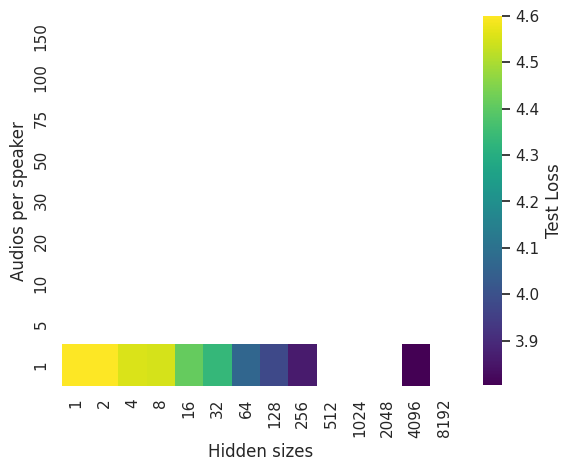

In [94]:
ax = sns.heatmap(np.array(test_losses_matrix), xticklabels=hidden_sizes, yticklabels=ns, cmap='viridis',vmax=4.6, cbar_kws={'label': 'Test Loss'})
ax.set(xlabel="Hidden sizes", ylabel="Audios per speaker")

[Text(0.5, 19.049999999999997, 'Hidden sizes'),
 Text(46.25, 0.5, 'Audios per speaker')]

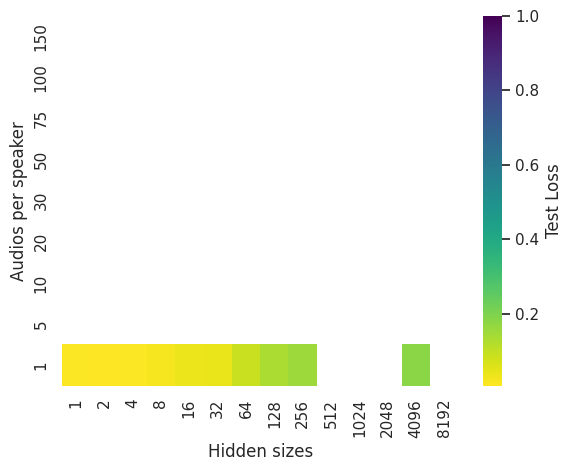

In [102]:
ax = sns.heatmap(np.array(test_acc1_matrix), xticklabels=hidden_sizes, yticklabels=ns, cmap='viridis_r',vmax=1, cbar_kws={'label': 'Test Loss'})
ax.set(xlabel="Hidden sizes", ylabel="Audios per speaker")

[Text(0.5, 19.049999999999997, 'Hidden sizes'),
 Text(46.25, 0.5, 'Audios per speaker')]

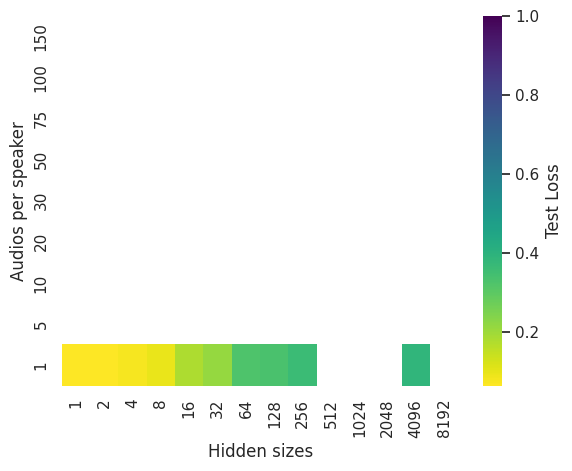

In [103]:
ax = sns.heatmap(np.array(test_acc5_matrix), xticklabels=hidden_sizes, yticklabels=ns, cmap='viridis_r',vmax=1, cbar_kws={'label': 'Test Loss'})
ax.set(xlabel="Hidden sizes", ylabel="Audios per speaker")

In [30]:
stds = []
means = []
for lr in df2.columns:
    stats = df2[lr].describe()
    stds.append((lr, stats["std"]))
    means.append((lr, stats["mean"]))

In [31]:
sorted(stds, key= lambda t: t[1])

[('0.0001', 0.03141909674620993),
 ('0.0005', 0.04096675365966844),
 ('0.001', 0.04916215625661934),
 ('0.00005', 0.12385652343190015),
 ('0.005', 0.2506197892441403),
 ('0.01', 0.6728874091606194),
 ('0.5', 0.849295224931807),
 ('0.00001', 1.0361049262315665),
 ('0.000001', 1.3047580663480565),
 ('0.000005', 1.3486832986701873),
 ('0.1', 1.7941165366204719),
 ('0.05', 1.8756848507058794),
 ('1', 1600.975553835322)]

In [32]:
sorted(means, key= lambda t: abs(t[1] - min_test_loss))

[('0.0005', 0.6206817626953125),
 ('0.001', 0.6311926047007242),
 ('0.0001', 0.645670011639595),
 ('0.00005', 0.7311253348986307),
 ('0.005', 0.8167936106522878),
 ('0.01', 1.1847959806521733),
 ('0.00001', 1.4510011076927185),
 ('0.000005', 1.9570602973302205),
 ('0.05', 2.362583855787913),
 ('0.1', 2.8410717646280923),
 ('0.000001', 3.282317022482554),
 ('0.5', 5.253352443377177),
 ('1', 469.3508378267288)]

In [3]:
project_path = "../speech_hypertuning/experiments/batch_size_vs_learning_rate/"
all_experiments = [path.parent.name for path in Path(project_path).rglob('*state.pkl')]
experiments_w_checkpoints = [path.parent.name for path in Path(project_path).rglob('*checkpoints')]
experiments_wo_checkpoint = [exp_name for exp_name in all_experiments if exp_name not in experiments_w_checkpoints]

In [4]:
len(experiments_wo_checkpoint)

11

In [5]:
rerun_pairs = []
for exp_name in experiments_wo_checkpoint:
    batch_size, lr = exp_name.split("-")
    batch_size = batch_size.split("_")[-1]
    lr = lr.split("_")[-1]
    rerun_pairs.append((batch_size, lr))

In [6]:
rerun_pairs = [(bs, lr) for bs, lr in rerun_pairs if float(lr) > 0.0001]
len(rerun_pairs)

8

In [206]:
import IPython

In [213]:
IPython.display.Audio("/datasets/Voxceleb1/wav/id10423/Tu2ZZgg-2Zg/00006.wav")

In [65]:
df = state['dataset_metadata']
df

,index,filename,sr,channels,frames,duration,speaker_id,video_id,segment_id,VGGFace1 ID,Gender,Nationality,Set,dataset,rel_path
0,0,/datasets/Voxceleb1/wav/id10109/QTfxDy-_m-Q/00...,16000,1,63361,3.960062,id10109,QTfxDy-_m-Q,00001,Bridget_Moynahan,f,USA,dev,voxceleb1,wav/id10109/QTfxDy-_m-Q/00001.wav
1,1,/datasets/Voxceleb1/wav/id10109/jkX45ShThUI/00...,16000,1,71041,4.440062,id10109,jkX45ShThUI,00002,Bridget_Moynahan,f,USA,dev,voxceleb1,wav/id10109/jkX45ShThUI/00002.wav
2,2,/datasets/Voxceleb1/wav/id10109/jkX45ShThUI/00...,16000,1,66561,4.160063,id10109,jkX45ShThUI,00001,Bridget_Moynahan,f,USA,dev,voxceleb1,wav/id10109/jkX45ShThUI/00001.wav
3,3,/datasets/Voxceleb1/wav/id10109/bo5LmzJjp8I/00...,16000,1,103681,6.480062,id10109,bo5LmzJjp8I,00002,Bridget_Moynahan,f,USA,dev,voxceleb1,wav/id10109/bo5LmzJjp8I/00002.wav
4,4,/datasets/Voxceleb1/wav/id10109/bo5LmzJjp8I/00...,16000,1,254721,15.920063,id10109,bo5LmzJjp8I,00001,Bridget_Moynahan,f,USA,dev,voxceleb1,wav/id10109/bo5LmzJjp8I/00001.wav
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153511,153511,/datasets/Voxceleb1/wav/id10262/1lgoknXVPG8/00...,16000,1,91521,5.720063,id10262,1lgoknXVPG8,00003,Drea_de_Matteo,f,USA,dev,voxceleb1,wav/id10262/1lgoknXVPG8/00003.wav
153512,153512,/datasets/Voxceleb1/wav/id10262/1lgoknXVPG8/00...,16000,1,116481,7.280062,id10262,1lgoknXVPG8,00004,Drea_de_Matteo,f,USA,dev,voxceleb1,wav/id10262/1lgoknXVPG8/00004.wav
153513,153513,/datasets/Voxceleb1/wav/id10262/y-8gJX5al-g/00...,16000,1,73601,4.600062,id10262,y-8gJX5al-g,00001,Drea_de_Matteo,f,USA,dev,voxceleb1,wav/id10262/y-8gJX5al-g/00001.wav
153514,153514,/datasets/Voxceleb1/wav/id10262/nJw-OI7Wrcs/00...,16000,1,64001,4.000063,id10262,nJw-OI7Wrcs,00002,Drea_de_Matteo,f,USA,dev,voxceleb1,wav/id10262/nJw-OI7Wrcs/00002.wav


In [69]:
df.groupby(['speaker_id']).size().min()


45

In [ ]:
10S -> Nmax=450
#Efecto de cantidad de muestras
Hidden Dim vs N para K hablantes (fijo K). El N incremental manteniendo muestras de Ns mas chicos. Solo en train. Val y test definir al principio sobre el total (N mas grande).
#Efecto de cantidad de hablantes sobre arquitectura.
Hidden Dim vs K.



In [22]:
from itertools import zip_longest

In [19]:
from tqdm import tqdm

In [23]:
# Sort by audio count intercalated by gender
sid_to_audios_count = df.groupby(['speaker_id']).size().to_dict()
sid_to_gender = (
    df[['speaker_id', 'Gender']]
    .drop_duplicates()
    .set_index("speaker_id")
    .to_dict()["Gender"]
)
sorted_sid_by_audios_count = [
    sid
    for sid, _ in sorted(
        sid_to_audios_count.items(), key=lambda tuple: tuple[1], reverse=True
    )
]

sorted_male_sid_by_audios_count = [
    sid for sid in sorted_sid_by_audios_count if sid_to_gender[sid] == "m"
]
sorted_female_sid_by_audios_count = [
    sid for sid in sorted_sid_by_audios_count if sid_to_gender[sid] == "f"
]

alternated_list = []
for male_sid, female_sid in zip_longest(
    sorted_male_sid_by_audios_count, sorted_female_sid_by_audios_count
):
    if male_sid is not None:
        alternated_list.append(male_sid)
    if female_sid is not None:
        alternated_list.append(female_sid)

In [99]:
df = state['dataset_metadata'].copy()
proportions = {"train": 0.75, "validation": 0.15, "test": 0.15}
RETRIES_DEFAULT = 30
dfs = []
extra_audios_list = [i for i in range(10)] + [i for i in range(-1, -6, -1)]
extra_audios_i = 0
np.random.seed(42)
for speaker_id in alternated_list:
    for partition, v in proportions.items():
        if partition != "train":
            print((speaker_id, partition))
            speaker_df = df[df.speaker_id == speaker_id].copy()
            speaker_df.drop("Set", axis=1, inplace=True)

            sample_size = int(len(speaker_df) * v)
            # Get group of video ids that sum sample_size + extra_audios (desirably extra_audios=0)
            # This is a naive approach to the knapsack problem
            video_id_to_audios_count = speaker_df.groupby(['video_id']).size().to_dict()
            print(video_id_to_audios_count)
            extra_audios_i = 0
            retries = RETRIES_DEFAULT
            found_group_of_videos = False
            while not found_group_of_videos:
                chosen_videos = []
                videos_sum = 0
                print(f"RETRY: {retries}")
                extra_audios = extra_audios_list[extra_audios_i]
                while videos_sum < sample_size + extra_audios:
                    remaining_audios = sample_size + extra_audios - videos_sum
                    print(f"remaining_audios: {remaining_audios} with extra videos {extra_audios} video sum {videos_sum}")
                    video_id_candidates = [
                        video_id
                        for video_id, audio_count in video_id_to_audios_count.items()
                        if video_id not in chosen_videos and audio_count <= remaining_audios
                    ]
                    if not video_id_candidates:
                        break

                    probabilities = [
                        audio_count # As all are less than remaining_audios, the bigger the closer to remaining_audios
                        for video_id, audio_count in video_id_to_audios_count.items()
                        if video_id in video_id_candidates
                    ]
                    normalized_probabilities = [prob / sum(probabilities) for prob in probabilities]
                    video_id = np.random.choice(a=video_id_candidates, size=1, replace=False, p=normalized_probabilities)[0]
                    chosen_videos.append(video_id)
                    videos_sum += video_id_to_audios_count[video_id]
                    print(f"chose: {video_id} with count {video_id_to_audios_count[video_id]} sum {videos_sum}")

                if videos_sum == sample_size + extra_audios:
                    found_group_of_videos = True
                elif retries == 0:
                    retries = RETRIES_DEFAULT
                    extra_audios_i += 1
                else:
                    retries -= 1

                if extra_audios_i >= len(extra_audios_list) or extra_audios / sample_size > 0.8:
                    raise ValueError(speaker_id)
            
            speaker_partition_df = speaker_df[speaker_df.video_id.isin(chosen_videos)].copy()
            df = df[~df.index.isin(speaker_partition_df.index)]  # Remove chosen
            speaker_partition_df['set'] = partition
            dfs.append(speaker_partition_df)

    # Train partition
    print((speaker_id, "train"))
    speaker_partition_df = df[df.speaker_id == speaker_id].copy()
    speaker_partition_df.drop("Set", axis=1, inplace=True)
    speaker_partition_df['set'] = "train"
    df = df[~df.index.isin(speaker_partition_df.index)]  # Remove chosen
    dfs.append(speaker_partition_df)

('id10986', 'validation')
{'33NaEPsiFEA': 4, '4p9Fm05hlIM': 11, '6SBGrr4iFp0': 50, '6c5ljEc2Clo': 3, '79oWAvMcAm0': 5, '94JZBdGzoxc': 1, 'GPPBWbOC1FM': 19, 'Gq881M1WnKM': 18, 'Hyck_yynhF4': 62, 'KH-yJAsKo1Q': 46, 'KZVJwFblEUo': 1, 'Pqwj7Sk4Qyw': 1, 'SfYt6Y6vrOI': 5, 'Vu__sFrtFfY': 5, 'Vzqmi3MAixQ': 127, 'XBqRyPiDJ9k': 1, 'XaXt-hdv2Js': 10, 'b7NFJBhE9EY': 5, 'd8H0ZdING7Y': 3, 'eWvntayRfe8': 89, 'fFnHb9jzYwU': 9, 'g7SptlsGbaA': 8, 'lFEBeMFuL_M': 131, 'p5qFkL8yVuI': 11, 's2077pq_vdY': 6, 'sOlWHKGy-SY': 122, 'tj0Mw2xTE74': 12, 'w7DmOHDIMQ8': 99, 'wJ_YINYHBwY': 25, 'wyklNur-auI': 1, 'xFTIClN5z70': 111, 'xmf3xBGKSoA': 1}
RETRY: 30
remaining_audios: 150 with extra videos 0 video sum 0
chose: d8H0ZdING7Y with count 3 sum 3
remaining_audios: 147 with extra videos 0 video sum 3
chose: xFTIClN5z70 with count 111 sum 114
remaining_audios: 36 with extra videos 0 video sum 114
chose: s2077pq_vdY with count 6 sum 120
remaining_audios: 30 with extra videos 0 video sum 120
chose: fFnHb9jzYwU with count

ValueError: id11088

In [98]:
extra_audios_list

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, -1, -2, -3, -4, -5]

In [102]:
df = state['dataset_metadata'].copy()
speaker_df = df[df.speaker_id == "id11088"].copy()
sample_size = int(len(speaker_df) * 0.15)
print(sample_size)
speaker_df.groupby(['video_id']).size().to_dict()

54


{'84v8I-I8LVA': 4,
 'Acz7RtcUXkk': 5,
 'Bsb2L2sGBb8': 1,
 'DutYuq39XEE': 56,
 'LTvynCSkhQ8': 5,
 'Ldmp1pdL3fs': 2,
 'PjFlQU0sCCQ': 1,
 'Q0YU_S7jFhA': 174,
 'ShDFMbz6y-o': 4,
 'URehJMHN6hI': 4,
 'Uud38zrOMRI': 2,
 'gmj-azFbpkA': 1,
 'k8pBR3o0bSg': 67,
 'm10Me1BG06g': 5,
 'qVruVasy3ck': 5,
 'qlIN7mVty3c': 6,
 'sSPuoJJOd8Q': 1,
 'uuHFwHdzlF8': 5,
 'x2m6UT2PEv0': 15}

In [ ]:
splits_df = pd.concat(dfs)
splits_df.to_csv(output_dir + "splits.csv")

In [38]:
df

,index,filename,sr,channels,frames,duration,speaker_id,video_id,segment_id,VGGFace1 ID,Gender,Nationality,Set,dataset,rel_path


In [39]:
df_final = pd.concat(dfs)

In [40]:
df_final

,index,filename,sr,channels,frames,duration,speaker_id,video_id,segment_id,VGGFace1 ID,Gender,Nationality,dataset,rel_path,set
141166,141166,/datasets/Voxceleb1/wav/id10986/w7DmOHDIMQ8/00...,16000,1,81281,5.080063,id10986,w7DmOHDIMQ8,00059,Rob_Reiner,m,USA,voxceleb1,wav/id10986/w7DmOHDIMQ8/00059.wav,validation
141161,141161,/datasets/Voxceleb1/wav/id10986/w7DmOHDIMQ8/00...,16000,1,70401,4.400062,id10986,w7DmOHDIMQ8,00078,Rob_Reiner,m,USA,voxceleb1,wav/id10986/w7DmOHDIMQ8/00078.wav,validation
141818,141818,/datasets/Voxceleb1/wav/id10986/lFEBeMFuL_M/00...,16000,1,215681,13.480063,id10986,lFEBeMFuL_M,00085,Rob_Reiner,m,USA,voxceleb1,wav/id10986/lFEBeMFuL_M/00085.wav,validation
141231,141231,/datasets/Voxceleb1/wav/id10986/eWvntayRfe8/00...,16000,1,75521,4.720063,id10986,eWvntayRfe8,00054,Rob_Reiner,m,USA,voxceleb1,wav/id10986/eWvntayRfe8/00054.wav,validation
141721,141721,/datasets/Voxceleb1/wav/id10986/lFEBeMFuL_M/00...,16000,1,402561,25.160062,id10986,lFEBeMFuL_M,00119,Rob_Reiner,m,USA,voxceleb1,wav/id10986/lFEBeMFuL_M/00119.wav,validation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138945,138945,/datasets/Voxceleb1/wav/id11229/5Zf0pcn-NZE/00...,16000,1,109441,6.840063,id11229,5Zf0pcn-NZE,00001,Will_Mellor,m,UK,voxceleb1,wav/id11229/5Zf0pcn-NZE/00001.wav,train
138947,138947,/datasets/Voxceleb1/wav/id11229/DYvkM8ow0Vk/00...,16000,1,78721,4.920063,id11229,DYvkM8ow0Vk,00001,Will_Mellor,m,UK,voxceleb1,wav/id11229/DYvkM8ow0Vk/00001.wav,train
138948,138948,/datasets/Voxceleb1/wav/id11229/3u1FSQiywhU/00...,16000,1,148481,9.280062,id11229,3u1FSQiywhU,00002,Will_Mellor,m,UK,voxceleb1,wav/id11229/3u1FSQiywhU/00002.wav,train
138949,138949,/datasets/Voxceleb1/wav/id11229/3u1FSQiywhU/00...,16000,1,113281,7.080063,id11229,3u1FSQiywhU,00001,Will_Mellor,m,UK,voxceleb1,wav/id11229/3u1FSQiywhU/00001.wav,train


In [ ]:
df_final.to_csv(